In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
# plt.rcParams['text.usetex'] = True
# sudo apt-get install texlive-latex-base texlive-fonts-recommended texlive-fonts-extra texlive-latex-extra
fontsize=25


In [4]:
graph_name = "com-dblp.ungraph.txt"

# Load the CSV into a DataFrame
df = pd.read_csv("../results/out_lp_snap_csv/runtimes.csv", index_col=0)
# df = df[df["Round"] != 0]

# df['Config'] = df['Config'].str.replace(",match_real_tectonic: false", "", regex=False)
# df = df[df["Config"] != "threshold: 10"]
# df = df[df['Input Graph'].isin([graph_name])]
# print(df.head())

# Average over rounds
# df_avg = df.groupby(['Clusterer Name', 'Input Graph', 'Threads', 'Config'])['Cluster Time'].mean().reset_index()
# # print(df_avg.head())

# df_one_thread = df_avg[df_avg["Threads"]==1]
# df_one_thread = df_one_thread.rename(columns={'Cluster Time': 'Single Thread Time'})
# df_one_thread = df_one_thread.drop(columns=["Threads"])
# df_avg = df_avg.merge(df_one_thread, on=['Clusterer Name', 'Input Graph', 'Config'])
# df_avg["Speedup"] =  df_avg["Single Thread Time"] /df_avg["Cluster Time"] 


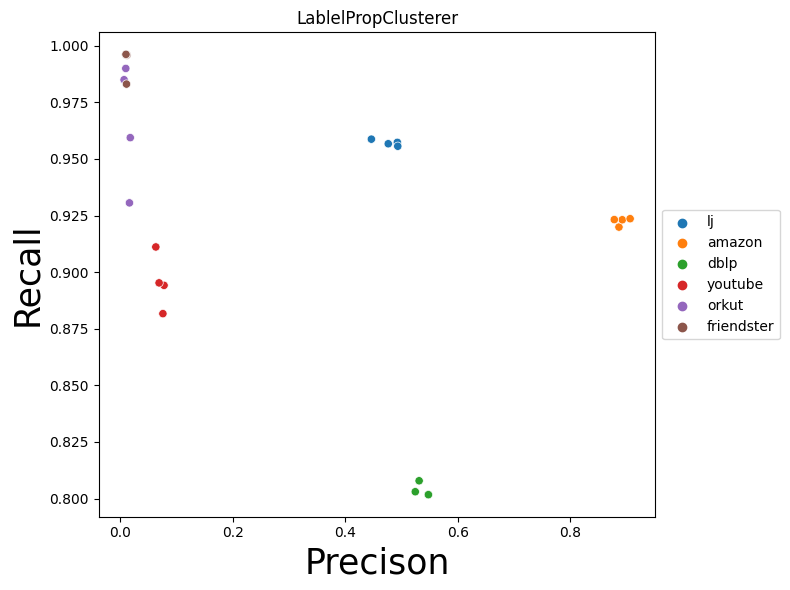

In [3]:
df = pd.read_csv("../results/out_lp_snap_csv/stats.csv", index_col=0)
df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "")
plt.figure(figsize=(8, 6))  # Set the figure size

# sns.lineplot(data=df, x="communityPrecision_mean", y="communityRecall_mean", legend=False)
sns.scatterplot(data=df, x="communityPrecision_mean", y="communityRecall_mean", hue="Input Graph")
# plt.title("TectonicClusterer")
plt.xlabel("Precison", fontsize = fontsize)
plt.ylabel("Recall", fontsize = fontsize)

# plt.xlim(0.3, 0.7)
# plt.ylim(0.7, 1)

plt.title("LablelPropClusterer")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("../results/out_lp_precision_recall.pdf")


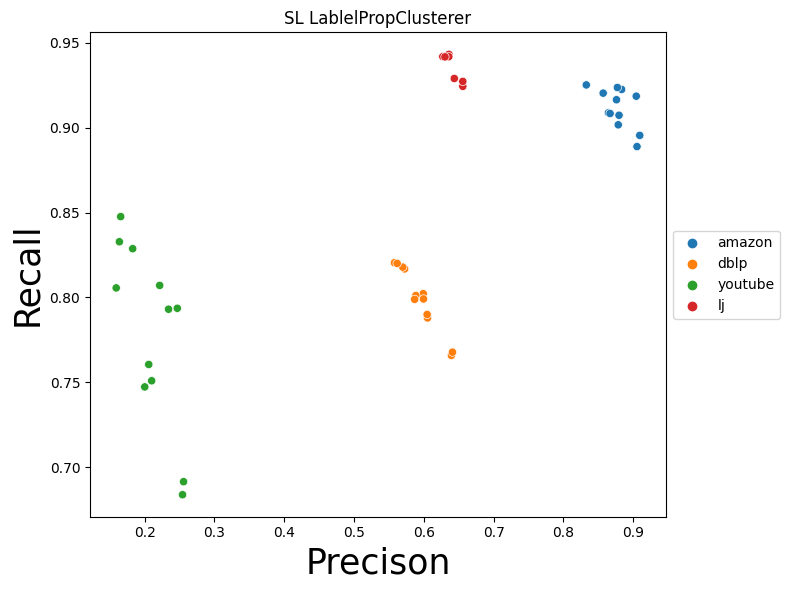

In [4]:
df = pd.read_csv("../results/out_slpa_snap_csv/stats.csv", index_col=0)
df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "")
plt.figure(figsize=(8, 6))  # Set the figure size

# sns.lineplot(data=df, x="communityPrecision_mean", y="communityRecall_mean", legend=False)
sns.scatterplot(data=df, x="communityPrecision_mean", y="communityRecall_mean", hue="Input Graph")
# plt.title("TectonicClusterer")
plt.xlabel("Precison", fontsize = fontsize)
plt.ylabel("Recall", fontsize = fontsize)

# plt.xlim(0.3, 0.7)
# plt.ylim(0.7, 1)

plt.title("SL LablelPropClusterer")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("../results/out_slpa_precision_recall.pdf")

In [7]:
selected_rows = df[df['Config'].str.contains('remove_nested: true')]

In [18]:
df['num_iteration'] = df['Config'].str.extract('max_iteration: (\d+)').astype(int)
df['prune_threshold'] = df['Config'].str.extract('prune_threshold: ([\d.]+)').astype(float)


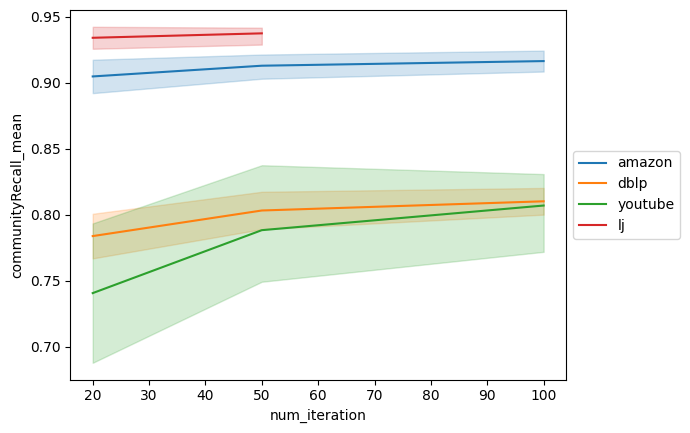

In [13]:
sns.lineplot(data=df, x="num_iteration", y="communityRecall_mean", hue="Input Graph")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


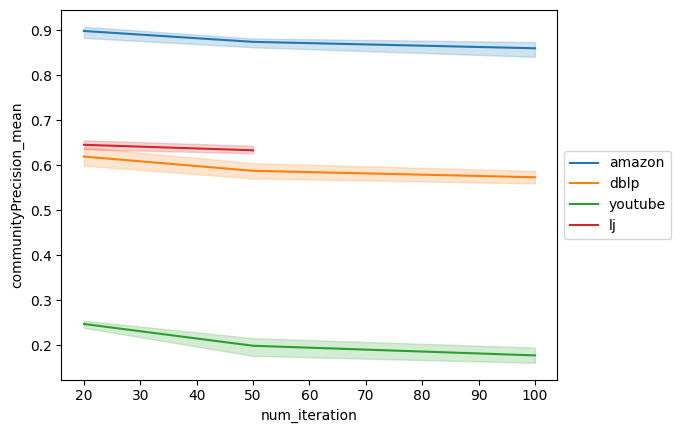

In [14]:
sns.lineplot(data=df, x="num_iteration", y="communityPrecision_mean", hue="Input Graph")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

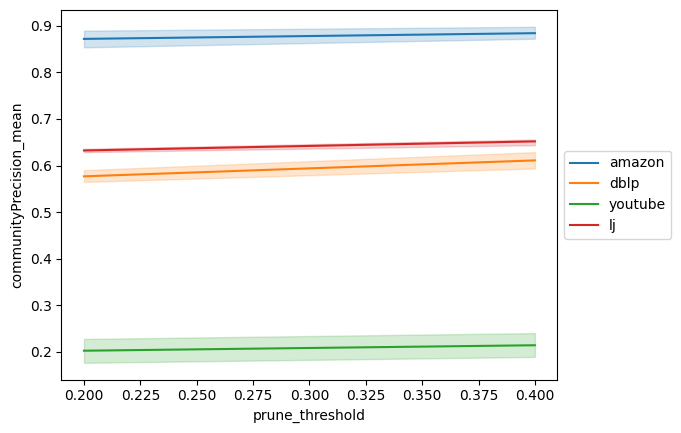

In [20]:
sns.lineplot(data=df, x="prune_threshold", y="communityPrecision_mean", hue="Input Graph")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))